## Main Course

  Get the code for this tutorial: https://github.com/nicknochnack/ReinforcementLearningCourse.git

  Watch the video: https://www.youtube.com/watch?v=Mut_u40Sqz4&list=WL&index=8&t=141s

  Note: 
  1. The code isn’t exactly the same as in the lecture video or the original repository because I updated and debugged it. I also added notes explaining the reasoning behind each step and the changes I made to make the code easier to understand and use.
  2. And if you run the code in Colab, it requires extra actions. 
  3. The original practice file from the lecture was a Jupyter Notebook using an Anaconda environment. I ran the code the same way to avoid additional setup steps required when using platforms like Google Colab. However, I plan to switch to VS Code in the future for easier and more practical implementation.
  
Finished to 45:06 

### 1. Import dependencies
  Documentation: https://stable-baselines3.readthedocs.io/en/master/


In [ ]:
# !pip install stable-baselines3

In [1]:
import os # to search the path
#import gym # for openAI gym --> old version
import gymnasium as gym
from stable_baselines3 import PPO # one of algorithms (see the document above)
from stable_baselines3.common.vec_env import DummyVecEnv # train models in multiple environment at same time; speed up training
from stable_baselines3.common.evaluation import evaluate_policy # test model's performance

### 2. Load Environment (Cartpole as example here)

The main environment functions are:
1. env.reset( ) - reset the environment and obtain initial oberservations
2. env.render( ) - visualise the environment
3. env.step( ) - apply an action to the environment
4. env.close( ) - close down the render frame

In [2]:
# create environment
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="rgb_array")
# In yhe early version, the render_mode is set with env.render(), but now it's better to setup render mode in env 
# to avoid this warning: 
# C:\conda\lib\site-packages\gymnasium\envs\classic_control\cartpole.py:250: 
# UserWarning: WARN: You are calling render method without specifying any render mode. 
# You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")

In [6]:
# # test environment: episodes is like one full game within the environment. Same environments
# have a fixed episode length e.g. cartpole wich is 200 frames. Others are continuous,
# e.g. Breakout, play until you run out of lives.

episodes = 5
for episode in range(1, episodes+1):
    state = env.reset() # Observations for the environment not just for the pole.
    # we will deliver these observations (state) to reinforcement learning agent to learn the optimal value.
    done = False
    truncated = False # This should be setup for new version of Gym
    score = 0

    while not (done or truncated):
        env.render()
        #action = random.choice([0,1]) # I use the funciton from Gym 
        action = env.action_space.sample() # random action
        n_state, reward, done, truncated, info = env.step(action) # pass random action
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:13.0
Episode:2 Score:34.0
Episode:3 Score:10.0
Episode:4 Score:14.0
Episode:5 Score:43.0


Understanding The Environment
https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [32]:
# Sample an action and observation
sample_action = env.action_space.sample()
sample_observation = env.observation_space.sample()
initial_observation, info = env.reset()


# Take one step in the environment using the sampled action
next_observation, reward, terminated, truncated, step_info = env.step(sample_action)
done = terminated or truncated  # Indicates whether the episode has ended

print(f"""
🎮 Action Space:
The actions you can take in the environment: {env.action_space}
(0 = push cart to the left, 1 = push cart to the right)
Sampled action: {sample_action}

🧠 Observation Space:
Observations represent [cart position, cart velocity, pole angle, pole angular velocity]
Observation space: {env.observation_space}
Sampled fake observation (random): {sample_observation}

🔁 Initial State:
Initial observation from env.reset(): {initial_observation}

🚶 One Step Result (env.step):
After taking action {sample_action}, we get:
- Next observation (new state): {next_observation}
- Reward: {reward} (typically 1 per step in CartPole)
- Terminated: {terminated} (True if failure condition met, e.g. pole falls)
- Truncated: {truncated} (True if time or step limit is reached)
- Done: {done} (True if either terminated or truncated)
- Info: {step_info} (optional debug info, often empty)
""")



🎮 Action Space:
The actions you can take in the environment: Discrete(2)
(0 = push cart to the left, 1 = push cart to the right)
Sampled action: 0 (you can observe in the following cells)

🧠 Observation Space:
Observations represent [cart position, cart velocity, pole angle, pole angular velocity]
Observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Sampled fake observation (random): [-0.4468542  -1.4022361   0.38534534 -1.717999  ]

🔁 Initial State:
Initial observation from env.reset(): [-0.00278883  0.01844998 -0.00379308 -0.00426596]

🚶 One Step Result (env.step):
After taking action 0, we get:
- Next observation (new state): [-0.00241983 -0.17661737 -0.0038784   0.2872178 ]
- Reward: 1.0 (typically 1 per step in CartPole)
- Terminated: False (True if failure condition met, e.g. pole falls)
- Truncated: False (True if time or step limit is reached)
- Done: False (True if either terminated or truncate

Here I would like to see how the results look like, therefore, I used and modified the method I learned from other's repo: https://github.com/szahlner/shadowhand-gym

In [8]:
# create environment
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="rgb_array")

episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    images = [env.render()]
    done = False
    truncated = False 
    score = 0

    while not (done or truncated):
        frame = env.render()
        action = env.action_space.sample() 
        n_state, reward, done, truncated, info = env.step(action) 
        score+=reward
        images.append(frame)
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:25.0
Episode:2 Score:21.0
Episode:3 Score:17.0
Episode:4 Score:24.0
Episode:5 Score:11.0


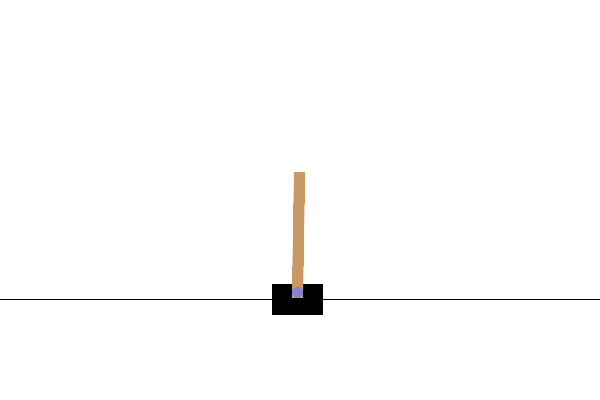

In [10]:
# !pip3 install numpngw
from numpngw import write_apng
from IPython.display import Image
# Convert to apng
write_apng("animation.png", images, delay=60)
# Show animation
Image(filename="animation.png")

### 3. Train an RL Model

Types of Algorithms:
- Model vs Model Free: learning based on predicitons of next state/reward or real samples.
- Stable baselines focuses on Model Free Algorithms.

Choosing Algorithms:
- There are a number of algorithms available through Stable Baselines as shown to the right. We can easily switch between each of these.
- Certain algorithms will perform better for certain environments. Often it helps to review literature in order to determine the best approach.

**Action Space**
- Discrete Single Process: DQN
- Discrete Multi Processed: PPO or A2C
- Continuous Single Process: SAC or TD3
- Continuous Multi Processed: PPO or A2C

Reference:
1. https://spinningup.openai.com/en/latest/index.html
2. https://smartlabai.medium.com/reinforcement-learning-algorithms-an-intuitive-overview-904e2dff5bbc
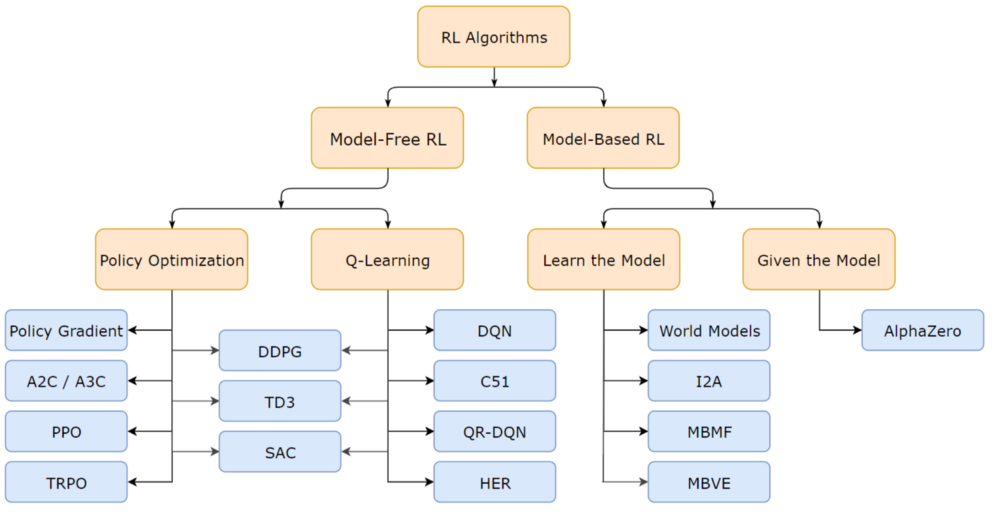

In [ ]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1)

In [ ]:
model.learn(total_timesteps=20000)

### 4. Save and Reload Model

In [ ]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model')

In [ ]:
print(PPO_path)

In [ ]:
model.save(PPO_path)

In [ ]:
del model

In [ ]:
load_model = PPO.load('Training\Saved Models\PPO_model', env=env)

### 5. Evaluation

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()

### 6. Test Model

In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done:
        print('info', info)
        break

In [ ]:
env.close()

### 7. Viewing Logs in Tensorboard

In [ ]:
log_path
training_log_path = os.path.join(log_path, 'PPO_3')

In [ ]:
!tensorboard --logdir={training_log_path}


### 8. Adding a callback to the training Stage

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [ ]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')

In [ ]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

In [ ]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env,
                             callback_on_new_best=stop_callback,
                             eval_freq=10000,
                             best_model_save_path=save_path,
                             verbose=1)

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

In [ ]:
model_path = os.path.join('Training', 'Saved Models', 'best_model')
model = PPO.load(model_path, env=env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()

### 9. Changing Policies

In [ ]:
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, policy_kwargs={'net_arch': net_arch})

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

### 10. Using an Alternate Algorithm

In [ ]:
from stable_baselines3 import DQN

In [ ]:
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

In [ ]:
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')

In [ ]:
model.save(dqn_path)

In [ ]:
model = DQN.load(dqn_path, env=env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()

## Project 1 - Breakout

### 1. Import Dependencies

In [ ]:
import gym
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import os

### 2. Test Environment

In [ ]:
environment_name = "Breakout-v0"

In [ ]:
env = gym.make(environment_name)

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

In [ ]:
env.action_space.sample()

In [ ]:
env.observation_space.sample()

### 3. Vectorise Environment and Train Model

In [ ]:
env = make_atari_env('Breakout-v0', n_envs=4, seed=0)

In [ ]:
env = VecFrameStack(env, n_stack=4)

In [ ]:
log_path = os.path.join('Training', 'Logs')

In [ ]:
model = A2C("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=400000)

### 4. Save and Reload Model

In [ ]:
a2c_path = os.path.join('Training', 'Saved Models', 'A2C_model')

In [ ]:
model.save(a2c_path)

In [ ]:
del model

In [ ]:
env = make_atari_env('Breakout-v0', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

In [ ]:
model = A2C.load(a2c_path, env)

### 5. Evaluate and Test

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
env.close()

## Project 2 - Self Driving

### 1. Import Dependencies

In [ ]:
#Install SWIG https://sourceforge.net/projects/swig/files/swigwin/swigwin-4.0.2/swigwin-4.0.2.zip/download?use_mirror=ixpeering

In [ ]:
!pip install gym[box2d] pyglet==1.3.2

In [ ]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
import os

### 2. Test Environment


In [ ]:
environment_name = "CarRacing-v0"

In [ ]:
env = gym.make(environment_name)

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

In [ ]:
env.close()

In [ ]:
env.action_space.sample()

In [ ]:
env.observation_space.sample()

### 3. Train Model

In [ ]:
log_path = os.path.join('Training', 'Logs')

In [ ]:
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=40000)

### 4. Save Model

In [ ]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_Driving_model')

In [ ]:
model.save(ppo_path)

### 5. Evaluate and Test

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()

In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
env.close()

## Project 3 - Custom Environment

https://sourceforge.net/projects/swig/files/swigwin/swigwin-4.0.2/swigwin-4.0.2.zip/download?use_mirror=ixpeering


### 1. Import Dependencies

In [ ]:
import gym
from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete
import numpy as np
import random
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

### 2. Types of Spaces

In [ ]:
Discrete(3)

In [ ]:
Box(0,1,shape=(3,3)).sample()

In [ ]:
Box(0,255,shape=(3,3), dtype=int).sample()

In [ ]:
Tuple((Discrete(2), Box(0,100, shape=(1,)))).sample()

In [ ]:
Dict({'height':Discrete(2), "speed":Box(0,100, shape=(1,))}).sample()

In [ ]:
MultiBinary(4).sample()

In [ ]:
MultiDiscrete([5,2,2]).sample()

### 3. Building an Environment

In [ ]:
class ShowerEnv(Env):
    def __init__(self):
        # Actions we can take, down, stay, up
        self.action_space = Discrete(3)
        # Temperature array
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        # Set start temp
        self.state = 38 + random.randint(-3,3)
        # Set shower length
        self.shower_length = 60

    def step(self, action):
        # Apply action
        # 0 -1 = -1 temperature
        # 1 -1 = 0
        # 2 -1 = 1 temperature
        self.state += action -1
        # Reduce shower length by 1 second
        self.shower_length -= 1

        # Calculate reward
        if self.state >=37 and self.state <=39:
            reward =1
        else:
            reward = -1

        # Check if shower is done
        if self.shower_length <= 0:
            done = True
        else:
            done = False

        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}

        # Return step information
        return self.state, reward, done, info

    def render(self):
        # Implement viz
        pass

    def reset(self):
        # Reset shower temperature
        self.state = np.array([38 + random.randint(-3,3)]).astype(float)
        # Reset shower time
        self.shower_length = 60
        return self.state

In [ ]:
env=ShowerEnv()

In [ ]:
env.observation_space.sample()

In [ ]:
env.reset()

In [ ]:
from stable_baselines3.common.env_checker import check_env

In [ ]:
check_env(env, warn=True)

### 4. Test Environment

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

In [ ]:
env.close()

### 5. Train Model

In [ ]:
log_path = os.path.join('Training', 'Logs')

In [ ]:
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=400000)

### 6. Save Model

In [ ]:
model.save('PPO')

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)